### 相关库的导入

In [5]:
import numpy as np  # numpy库用于数值计算
import matplotlib.pyplot as plt  # pyplot库用于绘图
import pandas as pd  # pandas库用于数据处理
import os  # os库用于处理文件路径

### csv文件读取函数

In [6]:
def load_data_pandas(file_path):
    # 使用pandas从csv文件中读取数据, 第一列是X, 第二列是Y
    try:
        data = pd.read_csv(file_path)
        X = data.iloc[:, 0].values
        Y = data.iloc[:, 1].values
        return X, Y
    except Exception as e:
        print(f"错误: 读取CSV文件时发生异常: {e}")
        return np.array([]), np.array([])

### 代价函数 J(θ)

In [7]:
def costFunctionJ(x, y, theta):
    # 计算代价函数J(θ)
    m = np.size(x, axis=0)  # 样本数量
    predictions = x * theta  # 预测值
    sqrErrors = np.multiply((predictions - y), (predictions - y))  # 残差平方
    j = 1 / (2 * m) * np.sum(sqrErrors)  # 代价函数
    return j

### 实现梯度下降算法的函数

In [8]:
def gradientDescent(x, y, theta, alpha, num_iters):
    # 梯度下降算法的实现
    m = len(y)  # 样本数量
    n = len(theta)  # 参数个数
    temp = np.mat(np.zeros([n, num_iters]))  # 存储theta更新历史
    j_history = np.mat(np.zeros([num_iters, 1]))  # 存储代价函数历史

    for i in range(num_iters):
        h = x * theta  # 预测值
        error = h - y  # 误差
        gradient = (x.T * error) / m  # 梯度
        theta = theta - alpha * gradient  # 更新theta
        temp[:, i] = theta  # 记录更新后的theta
        j_history[i] = costFunctionJ(x, y, theta)  # 记录代价函数值

        # 打印迭代信息（每10000次迭代打印一次）
        if (i+1) % 10000 == 0:
            print(f"迭代次数 {i+1}: 代价函数值 = {j_history[i, 0]:.4f}")

    return theta, j_history, temp

## 主函数

初始代价函数值: 45.5000
迭代次数 10000: 代价函数值 = 0.6967
迭代次数 20000: 代价函数值 = 0.6967
迭代次数 30000: 代价函数值 = 0.6967
迭代次数 40000: 代价函数值 = 0.6967
迭代次数 50000: 代价函数值 = 0.6967
迭代次数 60000: 代价函数值 = 0.6967
迭代次数 70000: 代价函数值 = 0.6967
迭代次数 80000: 代价函数值 = 0.6967
迭代次数 90000: 代价函数值 = 0.6967
迭代次数 100000: 代价函数值 = 0.6967
最终代价函数值： 0.6967063492063497
最终theta值：
 [[0.01904762]
 [2.03928571]]


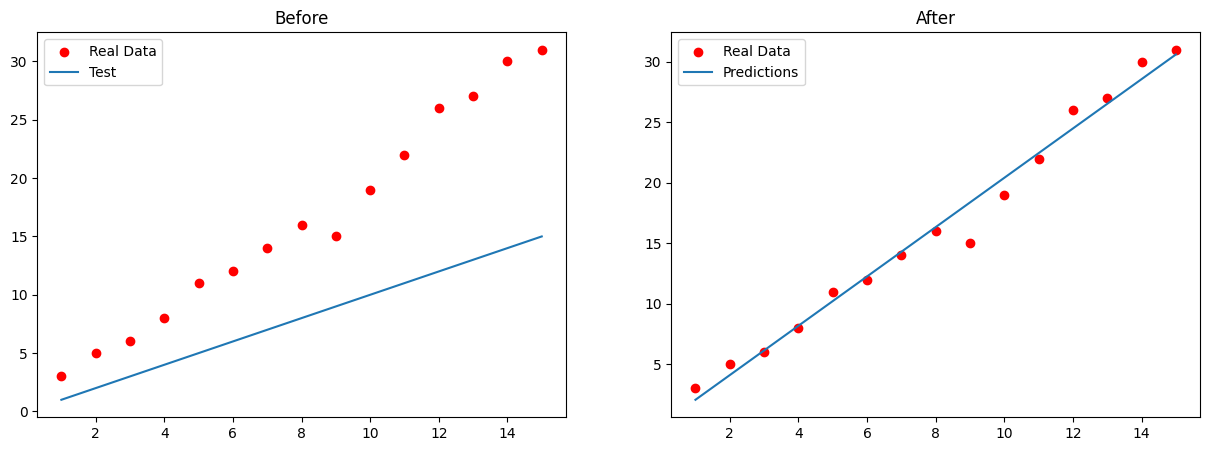

In [9]:
def main():
    # 1. 加载数据
    # 使用原始字符串避免转义字符问题，或者使用双反斜杠
    file_path = r'C:\Users\Lamarck\Desktop\Linear Regression.csv'
    if not os.path.exists(file_path):
        print(f"错误: 文件路径 '{file_path}' 不存在。请检查路径是否正确。")
        return

    X, Y = load_data_pandas(file_path)

    if len(X) == 0 or len(Y) == 0:
        print("错误: 数据加载失败，X或Y为空。请检查CSV文件内容。")
        return

    # 2. 准备数据矩阵
    m = len(Y)  # 样本数量
    X_b = np.hstack((np.ones((m, 1)), X.reshape(m, 1)))  # 添加偏置项
    x = np.mat(X_b)  # 转换为矩阵
    y = np.mat(Y).reshape(m, 1)  # 转换为列向量

    # 3. 初始化参数theta
    theta = np.mat([0, 1]).reshape(2, 1)

    # 4. 计算初始代价函数值
    initial_cost = costFunctionJ(x, y, theta)
    print(f"初始代价函数值: {initial_cost:.4f}")

    # 5. 绘制训练前的图像
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, c='r', label='Real Data')
    plt.plot(X, x * theta, label='Test')
    plt.legend(loc='best')
    plt.title('Before')

    # 6. 设置梯度下降参数并执行
    alpha = 0.01  # 学习率
    num_iters = 100000  # 迭代次数
    theta, j_history, temp = gradientDescent(x, y, theta, alpha, num_iters)

    # 7. 打印结果
    print('最终代价函数值：', j_history[-1, 0])
    print('最终theta值：\n', theta)

    # 8. 绘制训练后的图像
    plt.subplot(1, 2, 2)
    plt.scatter(X, Y, c='r', label='Real Data')
    plt.plot(X, x * theta, label='Predictions')
    plt.legend(loc='best')
    plt.title('After')
    plt.show()

if __name__ == "__main__":
    main()